# Laboratório #8

### Instruções

1. Quando você terminar os exercícios do laboratório, vá ao menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.

**Nome**:

**Matrícula**:

## Exercícios

#### 1) Desenhe uma rede MLP que calcule A ⊕ B, onde ⊕ representa a operação lógica XOR, a qual é definida pela tabela verdade abaixo.

| A | B | Saída |
|:-:|:-:|:-----:|
| 0 | 0 |   0   |
| 0 | 1 |   1   |
| 1 | 0 |   1   |
| 1 | 1 |   0   |

**DICAS**: 

+ A operação XOR pode ser calculada como: A ⊕ B = (A & !B)  |  (!A & B) )

<span style="color:blue">Anexe o desenho da rede MLP na tarefa correspondente a este laboratório no MS Teams.</span>

#### 2)  Dada a rede MLP mostrada na figura abaixo, encontre a derivada parcial do erro de saída, $e = d - y_{1}^{2}$, em relação aos pesos 

+ $w_{1,1}^{1}$, ou seja, $\frac{\partial e}{\partial w_{1,1}^{1}}$,
+ $w_{2,2}^{1}$, ou seja, $\frac{\partial e}{\partial w_{2,2}^{1}}$.

<img src="../figures/mlp_lab8.png" width="700" height="700">

**DICAS**:

+ Siga o equacionamento apresentado no material da aula.

<span style="color:blue">Anexe o equacionamento na tarefa correspondente a este laboratório no MS Teams.</span>

#### 3) Neste exercício você irá realizar a classificação da função lógica XOR com uma rede multi-layer perceptron (MLP). A tabela verdade e o gráfico com as classes dos elementos da tabela são mostrados abaixo. 

| x1 | x2 | Saída |
|:-:|:-:|:-----:|
| 0 | 0 |   0   |
| 0 | 1 |   1   |
| 1 | 0 |   1   |
| 1 | 1 |   0   |

<img src="../figures/xor_lab8.png" width="200" height="200">

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos das duas classes.

**DICAS**

+ Note que na célula abaixo, o conjunto de dados já é dividido em conjuntos de treinamento e validação.

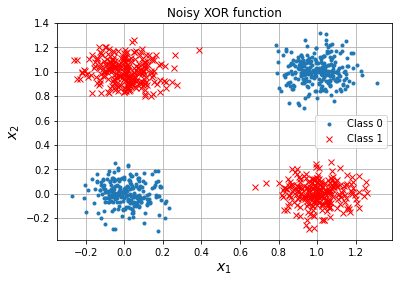

In [6]:
# Import all necessary libraries.
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neural_network import MLPClassifier

# Reset PN sequence generator.
seed = 42
np.random.seed(seed)

# Number of examples.
N = 1000

# Number of classes.
numberOfClasses = 2

# Create attributes.
x1 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)
x2 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)

# Target function.
y = x1 ^ x2

# Reshape into a single-dimension array.
y = y.ravel()

# Add noise to the attributes.
x1 = x1 + 0.1*np.random.randn(N,1)
x2 = x2 + 0.1*np.random.randn(N,1)

# Concatenate attribute vectors.
X = np.c_[x1, x2]

# Plot the two classes.
idx0 = np.argwhere(y.ravel() == 0)
idx1 = np.argwhere(y.ravel() == 1)
plt.plot(x1[idx0.ravel()], x2[idx0.ravel()], '.', label='Class 0')
plt.plot(x1[idx1.ravel()], x2[idx1.ravel()], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Noisy XOR function')
plt.legend()
plt.grid()
plt.show()

# Split array into random train and validation subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

2. Treine uma rede MLP usando uma instância da classe `MLPClassifier` da biblioteca SciKit-Learn com o conjunto de treinamento criado no item 1 deste exercício. **Use o menor número possível de nós para instanciar a rede MLP, a qual deve apresentar uma precisão de 100%.**

**DICAS**:

+ O exercício 1 irá te ajudar a encontrar o menor número possível de nós para se solucionar o problema da lógica XOR.
+ Para configurar o número de nós em cada uma das camadas escondidas, use o parâmetro `hidden_layer_sizes`, o qual recebe uma tupla, onde cada elemento é o número de nós em uma determinada cada escondida. Por exemplo, `hidden_layer_sizes=(3,2)` cria uma rede MLP com 2 camadas escondidas com 3 e 2 nós, respectivamente.
+ Configure o parâmetro `solver` da classe `MLPClassifier` com o valor `'lbfgs'`.
+ Configure o parâmetro `activation` da classe `MLPClassifier` com o valor `'logistic'`.
+ Configure o parâmetro `random_state` da classe `MLPClassifier` com o valor da semente criada no item 1 deste exercício.

+ Para mais informações sobre estes e outros parâmetros, acesse a documentação da classe `MLPClassifier` através do link: [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).

In [1]:
# Digite aqui o código do exercício.

3. Calcule e imprima a acurácia da rede MLP usando o **conjunto de validação** criado no item 1 deste exercício.

**DICAS**
+ Use a função `accuracy_score` da biblioteca SciKit-Learn para calcular a acurácia do perceptron.
+ A acurácia obtida deve ser de 100%.

In [2]:
# Digite aqui o código do exercício.

4. Crie uma figura mostrando as regiões de decisão do perceptron.

**DICAS**:

+ Lembre-se que as redes MLP usam combinações lineares dos atributos e que funções não-lineares são obtidas combinando-se nós (i.e., neurônios), portanto, não é necessário se alterar o formato da matriz de atributos passada ao objeto da classe `MLPClassifier`. A matriz precisa conter apenas os atributos $x_1$ e $x_2$.

In [3]:
# Digite aqui o código do exercício.

5. Plote a matriz de confusão da rede MLP para os exemplos do **conjunto de validação**.

In [4]:
# Digite aqui o código do exercício.